## Question 1: OpenAI CliffWalking-v0 (Value Iteration and Policy Ite-ration)
Use CliffWalking-v0 from OpenAI gym.
1. Create two agents to find the optimal policy using Policy Iteration and Value Iteration.
For PolicyIteration, break down your agent’s update function into a function to evaluate policy and a function
to improve policy. Also, create a ConfusedAgent, which randomly picks an action available from a given state
(No need to train this one)

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make("CliffWalking-v0")

### VALUE ITERATION

In [3]:
def value_iteration(gamma, num_iters):
    current_value_array = np.zeros(48) # 48 states
    prev_value_array = np.ones(48)  # 48 states
    optimal_policy = [0] * 48 # 48 states


    env.reset() # reset the environment
    actions = [0, 1, 2, 3] # 0: up, 1: right, 2: down, 3: left

    j = 0 

    while(j < num_iters): 
        prev_value_array = np.copy(current_value_array) # copy the current value array to previous value array
        for i in range(37): # 37 states
            
            value_list = [] # list to store the values of all actions
            for action in actions: # iterate over all possible actions
                # print(env.P[i][action])
                next_state, reward = env.P[i][action][0][1],env.P[i][action][0][2]# get the next state, reward
                # print(env.P[i][action])

                value_list.append(reward + gamma * prev_value_array[next_state]) # calculate the value of the action and append to the list
            
            current_value_array[i] , optimal_policy[i] = max(value_list), value_list.index(max(value_list)) # update the current value array and optimal policy
        
        j = j + 1

    
    return current_value_array, optimal_policy 

In [4]:
gamma = [0, 0.1, 0.5, 0.75, 1]

> OPTIMAL POLICY USING VALUE ITERATION

In [5]:
value_list, optimal_policy = value_iteration(gamma[1], 5000)

optimal_policy = np.array(optimal_policy).reshape(4, 12)

In [6]:
print(optimal_policy)

[[1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


### POLICY ITERATION

In [7]:
def policy_evaluation(policy, gamma):
        value_array = np.zeros(48) # 48 states
        for j in range(100):  ## contraction opeartor
            for state in range(37):
                next_state, reward = env.P[state][policy[state]][0][1],env.P[state][policy[state]][0][2] # get the next state, reward
                value_array[state] = reward + gamma * value_array[next_state] # calculate the value of the action and append to the list

        # prev_policy = np.copy(policy)
        # policy = policy_improvement(value_array, gamma)


        # if(np.array(prev_policy).all() == np.array(policy).all()):
        #     return policy 
        # else:
        #     policy_evaluation(policy, gamma, num_iters)
        
        policy = policy_improvement(value_array, gamma)
        
        return policy
        


def policy_improvement(value_array, gamma):
    prev_value_array = np.copy(value_array) # copy the current value array to previous value array
    actions = [0, 1, 2, 3] # 0: up, 1: right, 2: down, 3: left
    optimal_policy = [0] * 48 # 48 states
    
    for i in range(37): # 37 states
            value_list = [] # list to store the values of all actions
            for action in actions: # iterate over all possible actions
                # print(env.P[i][action])
                next_state, reward = env.P[i][action][0][1],env.P[i][action][0][2]# get the next state, reward
                # print(env.P[i][action])

                value_list.append(reward + gamma * prev_value_array[next_state]) # calculate the value of the action and append to the list
            
            optimal_policy[i] = value_list.index(max(value_list)) # update the current value array and optimal policy
    
    return optimal_policy 

def policy_iteration(gamma, num_iters):
    policy = [0] * 48 # 48 states


    for i in range(num_iters):
       policy = policy_evaluation(policy, gamma)



    return policy

In [8]:
gamma = [0, 0.1, 0.5, 0.75, 1]

> OPTIMAL POLICY USING POLICY ITERATION

In [9]:
policy = policy_iteration(1, 14)

In [10]:
policy = np.array(policy).reshape(4, 12)
print(policy)

[[1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


### Confused Agent

In [11]:
def confused_agent(gamma):## takes random actions till it reaches the termination state and returns the toatal reward
    env.reset()
    total_reward = 0
    factor = 1
    while True:
        action = env.action_space.sample()
        state, reward, done = env.step(action)[0], env.step(action)[1], env.step(action)[2]
        total_reward += factor * reward
        factor *= gamma
        if done:
            break
    
    return total_reward

In [12]:
gamma = [0, 0.1, 0.5, 0.75, 1]

> Random Reward

In [13]:
confused_total_reward = confused_agent(gamma[1])
print(confused_total_reward)

-11.01122001111111


/home/kiranreddybhumireddy/.local/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


> Return obtained vs Training iterations

2. Test-run and visualizing learning. </br>
(a) Compare and plot the agents’ learning using the return obtained vs training iterations. Are the 2 learned
agents performing better than ConfusedAgent (compare the final return of all three agents) ?

In [14]:
def value_iteration_total_reward(gamma, num_iters): ## returns the total reward for the value iteration
    final_value_array, optimal_policy = value_iteration(gamma, num_iters)

    env.reset()
    total_reward = 0
    factor = 1
    state = 0

    j = 0

    while True:
        action = optimal_policy[state]
        state, reward, done = env.step(action)[0], env.step(action)[1], env.step(action)[2]
        total_reward += factor * reward
        factor *= gamma
        if done:
            break

        j = j + 1

        if(j > 1000):
            break

    return total_reward

def policy_iteration_total_reward(gamma, num_iters): ## returns the total reward for the policy iteration
    final_policy = policy_iteration(gamma, num_iters)

    env.reset()
    total_reward = 0
    factor = 1
    state = 0

    j = 0

    while True:
        action = final_policy[state]
        state, reward, done = env.step(action)[0], env.step(action)[1], env.step(action)[2]
        total_reward += factor * reward
        factor *= gamma
        if done:
            break

        j = j + 1

        if(j > 1000):
            break

    return total_reward

In [15]:
num_iters = np.array([i for i in range(20)])

value_iteration_total_reward_list = []
policy_iteration_total_reward_list = []

for i in num_iters:
    value_iteration_total_reward_list.append(value_iteration_total_reward(gamma[1], i))
    policy_iteration_total_reward_list.append(policy_iteration_total_reward(gamma[1], i))

confused_total_reward_list = []

for i in num_iters:
    confused_total_reward_list.append(confused_agent(gamma[1]))


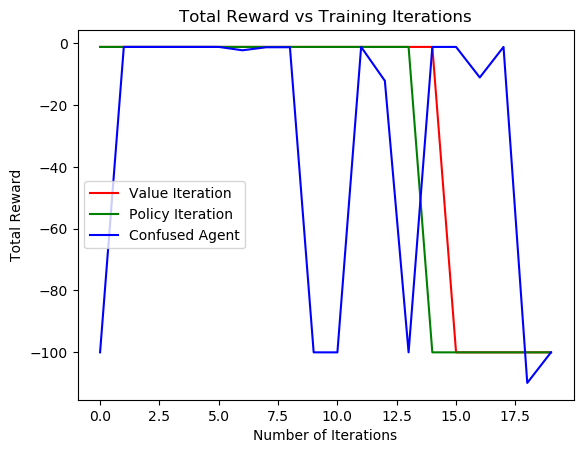

In [16]:
## plot the total reward vs number of iterations
plt.plot(num_iters, value_iteration_total_reward_list, label = 'Value Iteration', color = 'red')
plt.plot(num_iters, policy_iteration_total_reward_list, label = 'Policy Iteration', color = 'green')
plt.plot(num_iters, confused_total_reward_list, label = 'Confused Agent', color = 'blue')

plt.xlabel('Number of Iterations')
plt.ylabel('Total Reward')
plt.title('Total Reward vs Training Iterations')


plt.legend()
plt.show()

__Yes, the two learned agents performed better than confused agent__

(b) Compare differences in paths obtained by setting γ as [0, 0.1, 0.5, 0.75, 1] while learning. How does γ affect
the final path (or the policy learnt)?

In [17]:
policy_iteration_final_policy_list = []
policy_iteration_final_reward_list = []

value_iteration_final_policy_list = []
value_iteration_final_reward_list = []

for i in gamma:
    policy_iteration_final_policy_list.append(policy_iteration(i, 16))
    policy_iteration_final_reward_list.append(policy_iteration_total_reward(i, 16))

    value_iteration_final_policy_list.append(value_iteration(i, 16)[1])
    value_iteration_final_reward_list.append(value_iteration_total_reward(i, 16))


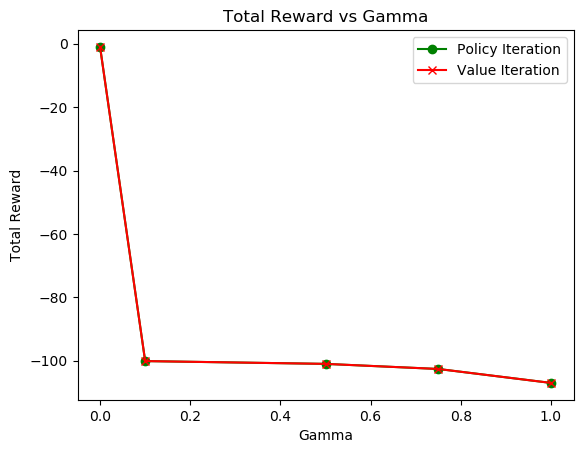

In [18]:
plt.plot(gamma, policy_iteration_final_reward_list, label = 'Policy Iteration', color = 'green', marker = 'o')
plt.plot(gamma, value_iteration_final_reward_list, label = 'Value Iteration', color = 'red', marker = 'x')

plt.xlabel('Gamma')
plt.ylabel('Total Reward')
plt.title('Total Reward vs Gamma')

plt.legend()
plt.show()



In [19]:
for i in range(len(gamma)):
    print('Gamma: ', gamma[i])
    print('Policy Iteration Final Policy: \n', np.array(policy_iteration_final_policy_list[i]).reshape(4, 12))
    print('Policy Iteration Final Reward: ', policy_iteration_final_reward_list[i])
    print('Value Iteration Final Policy: \n', np.array(value_iteration_final_policy_list[i]).reshape(4, 12))
    print('Value Iteration Final Reward: ', value_iteration_final_reward_list[i])
    print('\n')

Gamma:  0
Policy Iteration Final Policy: 
 [[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
Policy Iteration Final Reward:  -1
Value Iteration Final Policy: 
 [[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
Value Iteration Final Reward:  -1


Gamma:  0.1
Policy Iteration Final Policy: 
 [[1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
Policy Iteration Final Reward:  -100.1111111
Value Iteration Final Policy: 
 [[1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
Value Iteration Final Reward:  -100.1111111


Gamma:  0.5
Policy Iteration Final Policy: 
 [[1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
Policy Iteration Final Reward:  -100.9921875
Value Iteration Final Policy: 
 [[1 1 1 1 1 1 1 1 1

In [20]:
# plot gamma vs total reward for policy iteration and value iteration w.r.t iterations

policy_iteration_gamma_1 = []
policy_iteration_gamma_2 = []
policy_iteration_gamma_3 = []
policy_iteration_gamma_4 = []
policy_iteration_gamma_5 = []

value_iteration_gamma_1 = []
value_iteration_gamma_2 = []
value_iteration_gamma_3 = []
value_iteration_gamma_4 = []
value_iteration_gamma_5 = []

num_iters = [i for i in range(1, 21)]

for i in num_iters:
    policy_iteration_gamma_1.append(policy_iteration_total_reward(0, i))
    policy_iteration_gamma_2.append(policy_iteration_total_reward(0.1, i))
    policy_iteration_gamma_3.append(policy_iteration_total_reward(0.5, i))
    policy_iteration_gamma_4.append(policy_iteration_total_reward(0.75, i))
    policy_iteration_gamma_5.append(policy_iteration_total_reward(1, i))

    value_iteration_gamma_1.append(value_iteration_total_reward(0, i))
    value_iteration_gamma_2.append(value_iteration_total_reward(0.1, i))
    value_iteration_gamma_3.append(value_iteration_total_reward(0.5, i))
    value_iteration_gamma_4.append(value_iteration_total_reward(0.75, i))
    value_iteration_gamma_5.append(value_iteration_total_reward(1, i))

> policy iteration

Text(0.5, 1.0, 'Total Reward vs Number of Iterations for Policy Iteration')

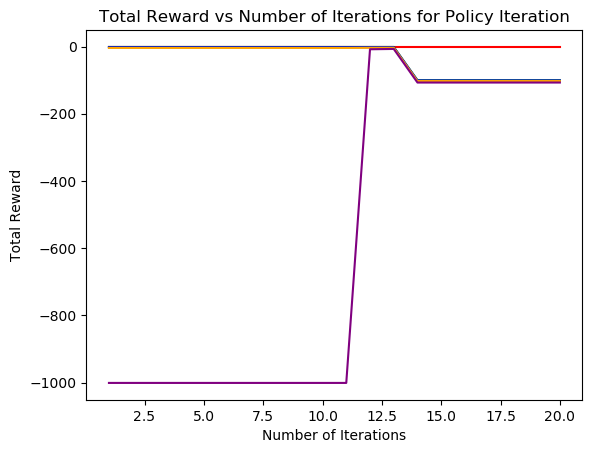

In [21]:
plt.plot(num_iters, policy_iteration_gamma_1, label = 'Gamma = 0', color = 'red')
plt.plot(num_iters, policy_iteration_gamma_2, label = 'Gamma = 0.1', color = 'green')
plt.plot(num_iters, policy_iteration_gamma_3, label = 'Gamma = 0.5', color = 'blue')
plt.plot(num_iters, policy_iteration_gamma_4, label = 'Gamma = 0.75', color = 'orange')
plt.plot(num_iters, policy_iteration_gamma_5, label = 'Gamma = 1', color = 'purple')

plt.xlabel('Number of Iterations')
plt.ylabel('Total Reward')
plt.title('Total Reward vs Number of Iterations for Policy Iteration')

> value iteration

Text(0.5, 1.0, 'Total Reward vs Number of Iterations for Value Iteration')

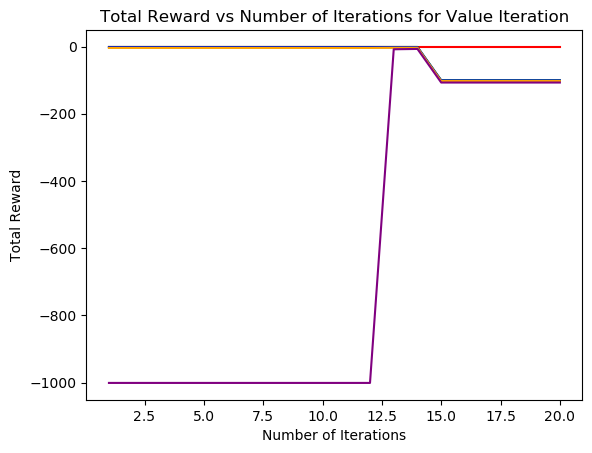

In [22]:
plt.plot(num_iters, value_iteration_gamma_1, label = 'Gamma = 0', color = 'red')
plt.plot(num_iters, value_iteration_gamma_2, label = 'Gamma = 0.1', color = 'green')
plt.plot(num_iters, value_iteration_gamma_3, label = 'Gamma = 0.5', color = 'blue')
plt.plot(num_iters, value_iteration_gamma_4, label = 'Gamma = 0.75', color = 'orange')
plt.plot(num_iters, value_iteration_gamma_5, label = 'Gamma = 1', color = 'purple')

plt.xlabel('Number of Iterations')
plt.ylabel('Total Reward')
plt.title('Total Reward vs Number of Iterations for Value Iteration')

> Does not converge for gamma = 0, but converges for all  other gamma